In [228]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [229]:
# Cell 2: Define dataset paths
train_path = 'datasets/brain_tumour/Training'
test_path = 'datasets/brain_tumour/Testing'

In [230]:
# Cell 3: Set up data augmentation for training and rescaling for testing
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
)

test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

In [231]:
# Cell 4: Create data generators
train_data = train_datagen.flow_from_directory(
    train_path,
    # 224
    target_size=(150, 150),
    # color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    # color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [237]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output layer with 4 classes (for each tumor type)
model.add(Dense(4, activation='softmax'))

# Display model summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_16 (Bat  (None, 72, 72, 64)     

In [238]:
# Cell 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [239]:
# Cell 7: Set up early stopping and learning rate reduction
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    restore_best_weights=True,
)

In [240]:
# Cell 8: Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
90/90 [==============================] - 13s 140ms/step - loss: 4.5606 - accuracy: 0.3721 - val_loss: 7.6904 - val_accuracy: 0.2716
Epoch 2/100
90/90 [==============================] - 12s 135ms/step - loss: 1.7560 - accuracy: 0.3993 - val_loss: 7.6544 - val_accuracy: 0.2563
Epoch 3/100
90/90 [==============================] - 12s 137ms/step - loss: 1.3430 - accuracy: 0.4199 - val_loss: 7.2159 - val_accuracy: 0.2360
Epoch 4/100
90/90 [==============================] - 13s 139ms/step - loss: 1.2960 - accuracy: 0.4387 - val_loss: 2.5014 - val_accuracy: 0.2538
Epoch 5/100
90/90 [==============================] - 12s 136ms/step - loss: 1.2058 - accuracy: 0.4523 - val_loss: 2.0281 - val_accuracy: 0.3223
Epoch 6/100
90/90 [==============================] - 13s 139ms/step - loss: 1.1614 - accuracy: 0.4732 - val_loss: 1.5212 - val_accuracy: 0.3325
Epoch 7/100
90/90 [==============================] - 12s 136ms/step - loss: 1.1406 - accuracy: 0.4871 - val_loss: 1.7571 - val_accuracy:

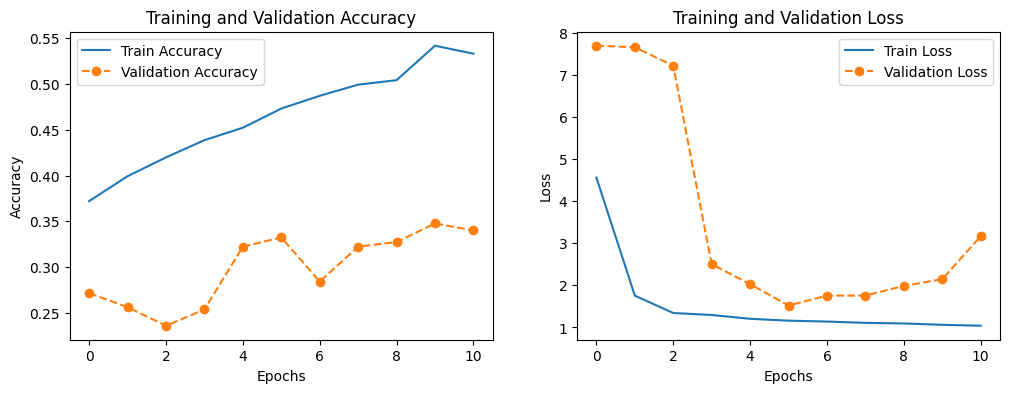

In [260]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [242]:
model.evaluate(test_data)

13/13 [==============================] - 1s 38ms/step - loss: 1.5212 - accuracy: 0.3325


[1.521172046661377, 0.3324873149394989]

In [246]:
model.evaluate(test_data)

13/13 [==============================] - 1s 37ms/step - loss: 1.5212 - accuracy: 0.3325


[1.521172285079956, 0.3324873149394989]

In [247]:
# Labels corresponding to classes based on the order of class indices
labels = ['glioma tumor', 'meningioma tumor', 'no tumor', 'pituitary tumor']

def load_image_processor(image_path):
    image = load_img(image_path, target_size=(150,150))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1,150,150,3)
    return image_arr

def predict_display(image_path):
    processed_image = load_image_processor(image_path)
    prediction = model.predict(processed_image)

    class_label = labels[np.argmax(prediction)]
    value = np.argmax(prediction)
    print(value)
    plt.title(f'prediction : {class_label}')
    plt.imshow(load_img(image_path, target_size=(150,150)))


1/1 [==============================] - 0s 27ms/step
3


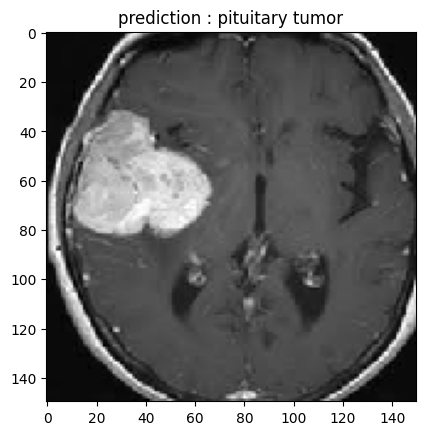

In [258]:
# image='datasets/brain_tumour/Training/glioma_tumor/gg (1).jpg'
image='datasets/brain_tumour/Testing/meningioma_tumor/image(90).jpg'
# image='datasets/brain_tumour/Testing/no_tumor/image(19).jpg'
# image='datasets/brain_tumour/Testing/pituitary_tumor/image(30).jpg'
predict_display(image)

In [252]:
print(train_data.class_indices)


{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
